#### Introduction/Business Problem


Road accident has been a major human issue for ages, with the government enforcing more safety rules and standards, vehicle manufactures adding more safety feature to their vehicles, the fatality rate of car accident has not really reduced.

A study of Seattle Department of Transportation traffic accident cases from 2004 to 2020, almost 16 years, provides a good insight to some of the reasons behind these accident/collisions. It goes from driving at high speed, alcohol and drug abuse to lack of attention/focus while during driving – use of cell phone.

Other feature observed from that data includes weather, visibility and road conditions. This project will analyze the collision dataset, find patterns and determinate key factors using various analytical techniques and machine learning classification algorithms such as logistic regression, decision tree analysis, k-nearest-neighbors, support vector machine, etc. and predict the different accidents severity.

The target audience for this project is as follows:-

1. The Seattle local government: - it will help improve traffic policies, update public facilities such as streetlight, traffic signs and alert etc.
2. Police: - Enforcing the law and make sure traffic laws are following and distracted drivers are taken off the road.
3. Car insurance institutes: - Check drivers license and records before issuing.
4. ALL DRIVERS: - To follow/obey all traffic signs and laws, knowing that safety is very important and what their family or love ones will pass through if there was an accident.

The Project's objective is to create a way to warn people based on factors such as weather and road conditions, the possibility of getting into a car accident and how severe it would be. So that the end user can drive more carefully or change travel plans if necessary.

#### Data Section

The dataset for this project is from Seattle Police Department and Accident Traffic Records Department from 2004 to present, provided by Coursera IBM capstone project for downloading through a link. It consists of 37 independent variables and 194,673 rows, also a dependent variable, SEVERITYCODE, that contains numbers which corresponds to different levels of severity caused by an accident/collision.

Severity codes are as follows: 
- 0: Little to no Probability (Clear Conditions) 
- 1: Very Low Probability — Chance or Property Damage 
- 2: Low Probability — Chance of Injury 
- 3: Mild Probability — Chance of Serious Injury - 4: High Probability — Chance of Fatality

The indicator SEVERITYCODE is chosen as the dependent variable while other attributes like nature and human factors will enable us to build a model that will predict the chance of an accident and how severe it would be based on them.

Human factors are as follows INATTENTIONIND, UNDERINFL, and SPEEDING which shows the concentration of the drivers mind, drug or alcohol influence and overspeed.
Nature factors are made up by WEATHER, ROADCOND and LIGHTCOND which represents weather, road and view circumstance respectively.
The dataset needs to be process before use, drop non-relevant columns and for the features, convert object data types into numerical data types. The target feature "SEVERITYCODE" is imbalance, simple statistical technique is used to balance it.

To fully understand the data, I run a value of the following features/attributes to those having most influence.

- ROADCOND: - The condition of the road during the collision.
- WEATHER : - A description of the weather conditions during the time of the collision
- LIGHTCOND: -The light conditions during the collision.
- UNDERINFL: - Whether or not a driver involved was under the influence of drugs or alcohol.

The results can be seen below:

- Notebook from the IBM WATSON Studio is used to process the dataset and will equally be used to build Machine Learning models. The Github repository enables the link sharing.

- Packages and libraries: We will use libraries and packages for both data manipulation and data visualization. PANDA, NUMPY, SCIPY, Matplotlib, Seaborn

#### Importing libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab as pl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
# from sklearn.metrics import jaccard_similarity_score, log_loss, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
#import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
from imblearn.over_sampling import SMOTE

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

#### Study Dataset - Plotting counts of selected variables to see the features having most influence

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


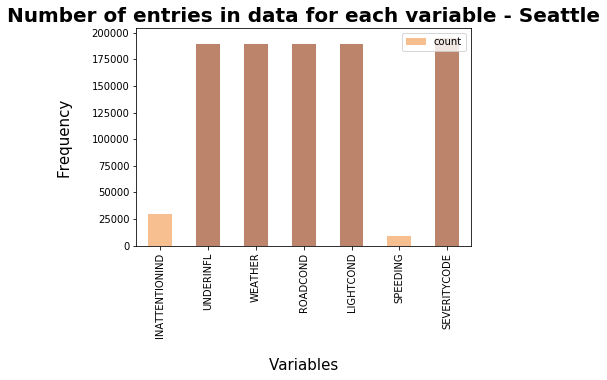

In [5]:
#Descriptive Stats
descriptive_stats=df.describe(include="all")

    #Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=90)
plt.show()

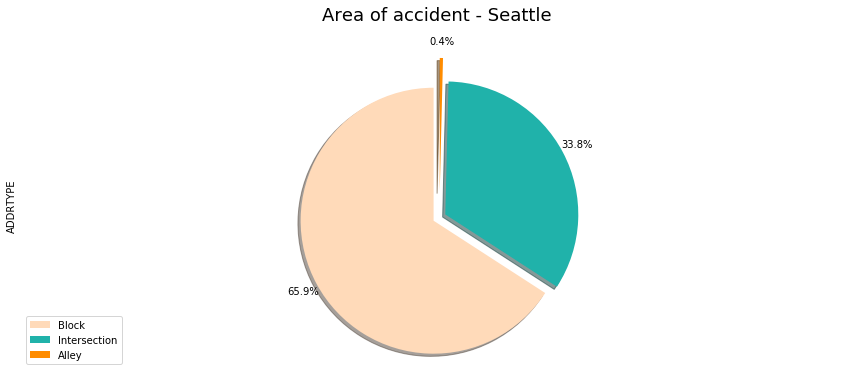

In [6]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)

plt.title('Area of accident - Seattle ', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [7]:
#Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df ["SEVERITYCODE"] = severity_code

In [8]:
df['SEVERITYCODE'].value_counts()

0    136485
1     58188
Name: SEVERITYCODE, dtype: int64

In [9]:
from sklearn.utils import resample

# The number of rows in class 0 far bigger than the number of rows in class 1. To balance the rowas, we downsample class 0.

df_major = df[df.SEVERITYCODE==0]
df_min = df[df.SEVERITYCODE==1]

df_major_dsample = resample(df_major,
                            replace = False,
                            n_samples = 58188,
                            random_state=123)

df_bal = pd.concat([df_major_dsample, df_min])
df_bal.SEVERITYCODE.value_counts()

1    58188
0    58188
Name: SEVERITYCODE, dtype: int64

In [10]:
df_bal.shape

(116376, 38)

#### Processing Data

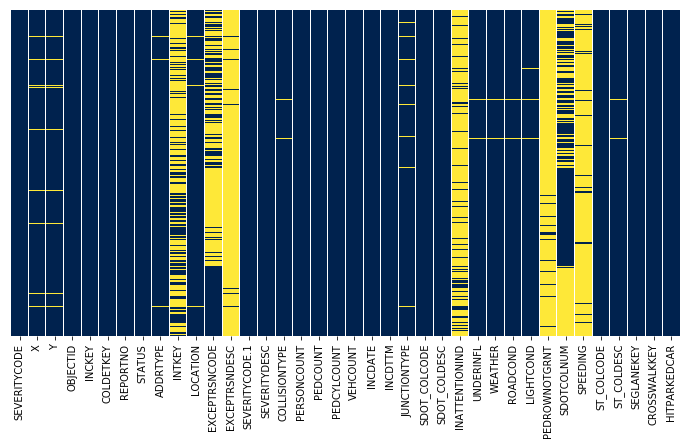

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(df_bal.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [12]:
# clean up the dataset to remove unnecessary columns - Drop columns with null data
df_bal.drop(['SPEEDING','SDOTCOLNUM','PEDROWNOTGRNT','INATTENTIONIND'
                    ,'EXCEPTRSNDESC','EXCEPTRSNCODE', 'INTKEY'], axis=1,inplace=True)

In [13]:
df_new = df_bal.dropna()

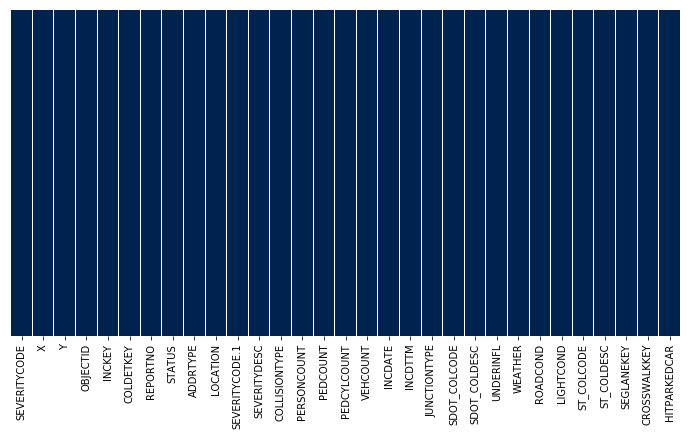

In [14]:
plt.figure(figsize = (12,6))
sns.heatmap(df_new.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [15]:
df_new.shape

(108745, 31)

In [16]:
df_new.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Weather Condition for accidents')

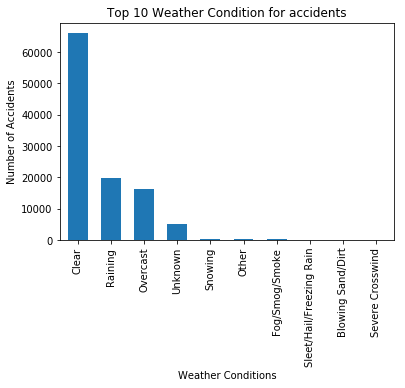

In [17]:
fig, ax=plt.subplots()
df_new['WEATHER'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.6, align='center')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
ax.tick_params()
plt.title('Top 10 Weather Condition for accidents')

In [18]:
df_new['INCDATE'] = pd.to_datetime(df_new['INCDATE'])
df_new['Hour'] =df_new['INCDATE'].apply(lambda time: time.hour)
df_new['Month'] =df_new['INCDATE'].apply(lambda time: time.month)
df_new['Day of Week'] = df_new['INCDATE'].apply(lambda time: time.dayofweek)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_new['Day of Week'] = df_new['Day of Week'].map(dmap)

dmap1 = {0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'Jun',6:'Jul',7:'Aug',8:'Sept',9:'Oct',10:'Nov',11:'Dec'}
df_new['Month'] = df_new['Month'].map(dmap1)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Fri    17807
Thu    16579
Wed    16158
Tue    16123
Sat    15257
Mon    14777
Sun    12044
Name: Day of Week, dtype: int64

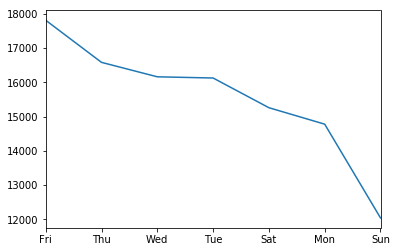

In [19]:
df_new['Day of Week'].value_counts().plot(kind = 'line')
df_new['Day of Week'].value_counts()

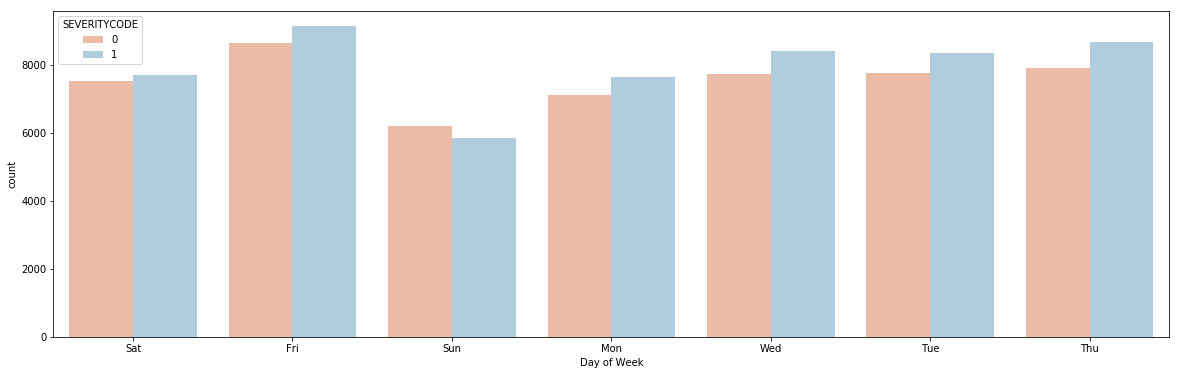

In [20]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Day of Week', data = df_new,
              hue = 'SEVERITYCODE', palette = 'RdBu')

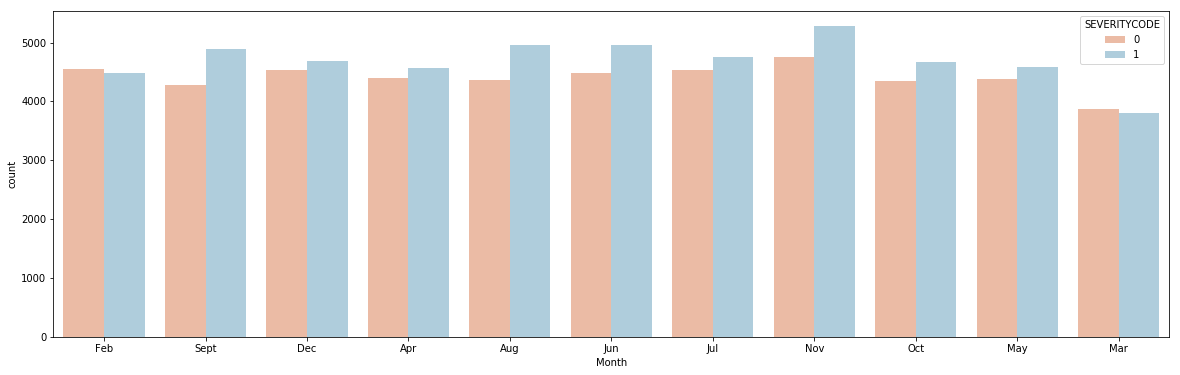

In [21]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Month', data = df_new, 
              hue = 'SEVERITYCODE', palette = 'RdBu')

In [22]:
df_new["WEATHER"].value_counts()

Clear                       66069
Raining                     19768
Overcast                    16353
Unknown                      5282
Snowing                       458
Other                         364
Fog/Smog/Smoke                345
Sleet/Hail/Freezing Rain       62
Blowing Sand/Dirt              28
Severe Crosswind               12
Partly Cloudy                   4
Name: WEATHER, dtype: int64

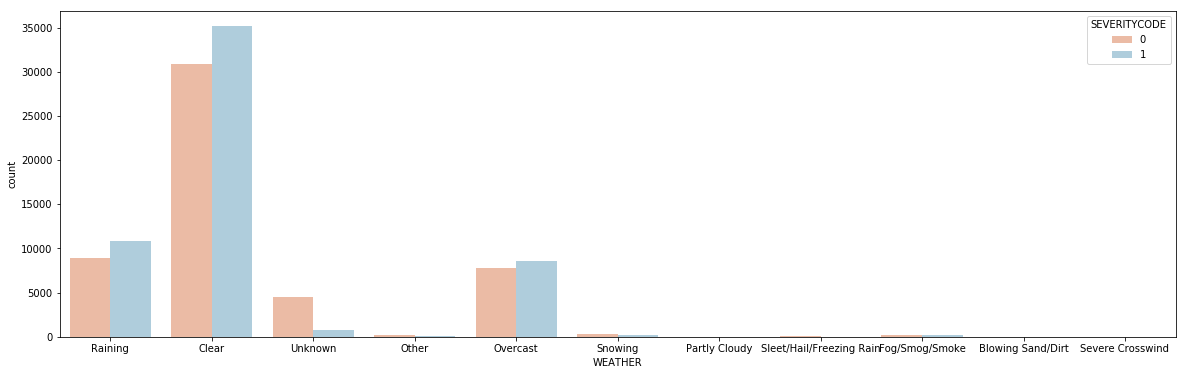

In [23]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'WEATHER', data = df_new , 
              hue = 'SEVERITYCODE', palette = 'RdBu')

In [24]:
df_new["ROADCOND"].value_counts()

Dry               73879
Wet               28316
Unknown            5193
Ice                 650
Snow/Slush          515
Other                72
Standing Water       48
Sand/Mud/Dirt        39
Oil                  33
Name: ROADCOND, dtype: int64

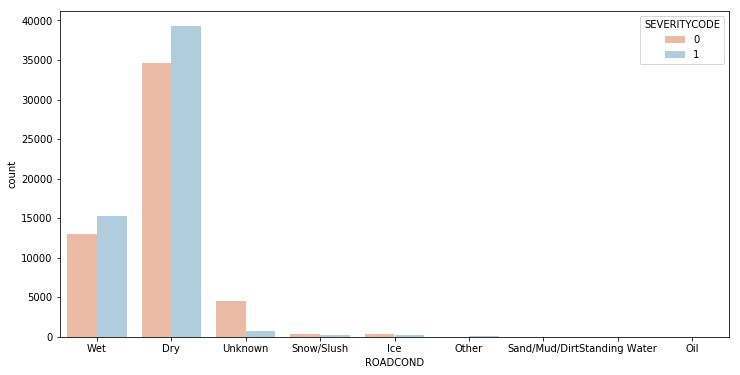

In [25]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'ROADCOND', data = df_new , 
              hue = 'SEVERITYCODE', palette = 'RdBu')

In [26]:
df_new["LIGHTCOND"].value_counts()

Daylight                    69371
Dark - Street Lights On     28128
Unknown                      4707
Dusk                         3488
Dawn                         1479
Dark - No Street Lights       809
Dark - Street Lights Off      665
Other                          91
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

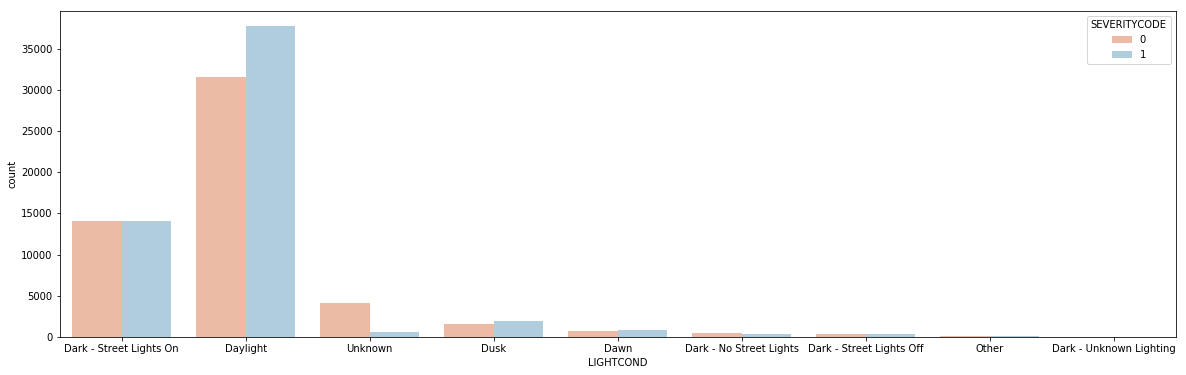

In [27]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'LIGHTCOND', data = df_new , 
              hue = 'SEVERITYCODE', palette = 'RdBu')

In [28]:
df_new["UNDERINFL"].value_counts()

N    57041
0    45912
Y     3219
1     2573
Name: UNDERINFL, dtype: int64

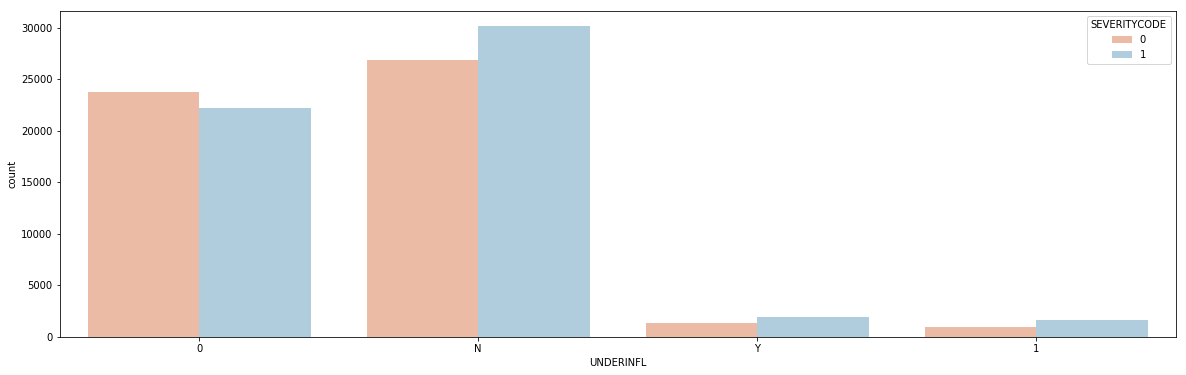

In [29]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'UNDERINFL', data = df_new , 
              hue = 'SEVERITYCODE', palette = 'RdBu')

In [30]:
#Check IncKey unqiue numbers
df_new['INCKEY'].nunique()

108745

In [31]:
#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df_new["ROADCOND"].replace("Dry", 0, inplace=True)
df_new["ROADCOND"].replace("Wet", 2, inplace=True)
df_new["ROADCOND"].replace("Ice", 2, inplace=True)
df_new["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df_new["ROADCOND"].replace("Other", "Unknown", inplace=True)
df_new["ROADCOND"].replace("Standing Water", 2, inplace=True)
df_new["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df_new["ROADCOND"].replace("Oil", 2, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [32]:
#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df_new["WEATHER"].replace("Clear", 0, inplace=True)
df_new["WEATHER"].replace("Raining", 3, inplace=True)
df_new["WEATHER"].replace("Overcast", 1, inplace=True)
df_new["WEATHER"].replace("Other", "Unknown", inplace=True)
df_new["WEATHER"].replace("Snowing", 3, inplace=True)
df_new["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df_new["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df_new["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df_new["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df_new["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

In [33]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df_new["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df_new["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df_new["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df_new["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df_new["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df_new["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df_new["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df_new["LIGHTCOND"].replace("Other","Unknown", inplace=True)

In [34]:
#Encoding Under the influence (0 = No, 1 = Yes)
df_new["UNDERINFL"].replace("N", 0, inplace=True)
df_new["UNDERINFL"].replace("Y", 1, inplace=True)

In [35]:
#Making new dataframe with only variables and unique keys
selected_columns=df_new[["X","Y","INCKEY","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

np.count_nonzero(feature_df['UNDERINFL'])

51704

In [36]:
    #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

In [37]:
#Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

In [38]:
#Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

In [39]:
   #Converting remaining to int
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

In [40]:
#ML Feature Sets
X=feature_df[["UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [41]:
feature_df.head()

,X,Y,INCKEY,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
25055,-122.292730,47.719265,43684,0,3,2,1,0
65280,-122.329124,47.608658,84514,0,0,0,0,0
86292,-122.292434,47.733753,110476,0,0,0,0,0
64598,-122.339185,47.625594,84273,0,0,0,0,0
119954,-122.382814,47.562874,150376,0,0,0,0,0


In [42]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.23718913,  1.65106782,  1.97996853,  1.33988203],
       [-0.23718913, -0.60961097, -0.62204817, -0.66465065],
       [-0.23718913, -0.60961097, -0.62204817, -0.66465065],
       [-0.23718913, -0.60961097, -0.62204817, -0.66465065],
       [-0.23718913, -0.60961097, -0.62204817, -0.66465065]])

In [43]:
#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (76121, 4) (76121, 1)
Test set: (32624, 4) (32624, 1)


##### Notebook from the IBM WATSON Studio is used to process the dataset and will equally be used to build Machine Learning models. The Github repository and running Jupyter
###### Data has been processed, will be using linear regression, decision tree analysis, k-nearest-neighbors, support vector machine, etc. for the analysis and prediction.


